Epoch 1/10
422/422 [==============================] - 3s 4ms/step - loss: 0.3477 - accuracy: 0.9009 - val_loss: 0.1732 - val_accuracy: 0.9495
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1421 - accuracy: 0.9586 - val_loss: 0.1225 - val_accuracy: 0.9650
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9701 - val_loss: 0.0988 - val_accuracy: 0.9713
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0761 - accuracy: 0.9774 - val_loss: 0.0902 - val_accuracy: 0.9715
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.0813 - val_accuracy: 0.9770
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0841 - val_accuracy: 0.9758
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0805 - val_accuracy: 0.9780
Epoch 

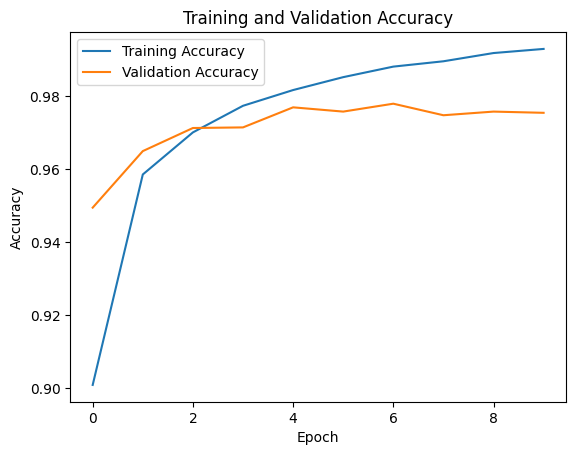

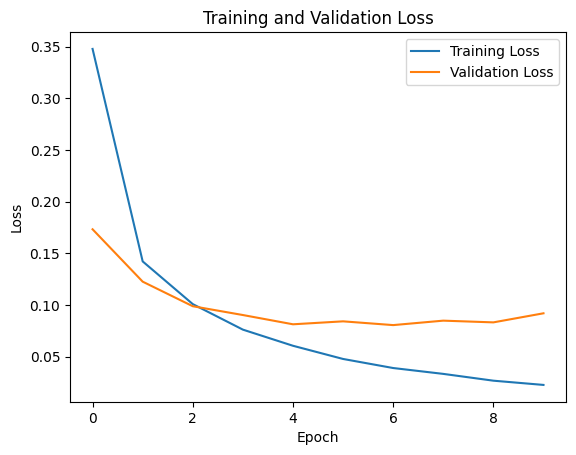

1/1 [==============================] - 0s 26ms/step


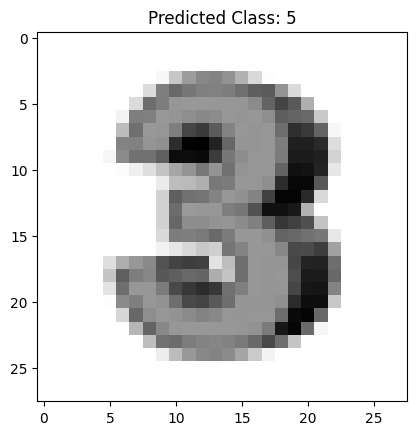

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Split the dataset into training, validation, and test sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train_categorical, test_size=0.1, random_state=42)

# Design MLP architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Adjust input shape
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_split, y_train_split, epochs=10, batch_size=128, validation_data=(X_val_split, y_val_split))

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test_categorical)
print("Test Accuracy:", test_acc)

# Make predictions on test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load your image
img_path = '/content/three.jpeg'  # Replace 'path_to_your_image.png' with the path to your image file
img = Image.open(img_path)

# Preprocess the image
img_resized = img.resize((28, 28))
img_grayscale = img_resized.convert('L')
img_array = np.array(img_grayscale) / 255.0
img_input = img_array.reshape(1, 28, 28)  # Reshape the image array to match the model's input shape

# Make predictions
predictions = model.predict(img_input)
predicted_class = np.argmax(predictions)

# Display the image and predicted class
plt.imshow(img_array, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()